# Introduction to linear regression

### The movie Moneyball focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, betterpredict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

### In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/mlb11.csv'
url_content = requests.get(df_url, verify=False).content
mlb11 = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
mlb11

team  runs  at_bats  hits  homeruns  bat_avg  strikeouts  \
0           Texas Rangers   855     5659  1599       210    0.283         930   
1          Boston Red Sox   875     5710  1600       203    0.280        1108   
2          Detroit Tigers   787     5563  1540       169    0.277        1143   
3      Kansas City Royals   730     5672  1560       129    0.275        1006   
4     St. Louis Cardinals   762     5532  1513       162    0.273         978   
5           New York Mets   718     5600  1477       108    0.264        1085   
6        New York Yankees   867     5518  1452       222    0.263        1138   
7       Milwaukee Brewers   721     5447  1422       185    0.261        1083   
8        Colorado Rockies   735     5544  1429       163    0.258        1201   
9          Houston Astros   615     5598  1442        95    0.258        1164   
10      Baltimore Orioles   708     5585  1434       191    0.257        1120   
11    Los Angeles Dodgers   644     5436  1395       117    0.257        1087   
12           Chicago Cubs   654     5549  1423       148    0.256        1202   
13        Cincinnati Reds   735     5612  1438       183    0.256        1250   
14     Los Angeles Angels   667     5513  1394       155    0.253        1086   
15  Philadelphia Phillies   713     5579  1409       153    0.253        1024   
16      Chicago White Sox   654     5502  1387       154    0.252         989   
17      Cleveland Indians   704     5509  1380       154    0.250        1269   
18   Arizona Diamondbacks   731     5421  1357       172    0.250        1249   
19      Toronto Blue Jays   743     5559  1384       186    0.249        1184   
20        Minnesota Twins   619     5487  1357       103    0.247        1048   
21        Florida Marlins   625     5508  1358       149    0.247        1244   
22     Pittsburgh Pirates   610     5421  1325       107    0.244        1308   
23      Oakland Athletics   645     5452  1330       114    0.244        1094   
24         Tampa Bay Rays   707     5436  1324       172    0.244        1193   
25         Atlanta Braves   641     5528  1345       173    0.243        1260   
26   Washington Nationals   624     5441  1319       154    0.242        1323   
27   San Francisco Giants   570     5486  1327       121    0.242        1122   
28       San Diego Padres   593     5417  1284        91    0.237        1320   
29       Seattle Mariners   556     5421  1263       109    0.233        1280   

    stolen_bases  wins  new_onbase  new_slug  new_obs  
0            143    96       0.340     0.460    0.800  
1            102    90       0.349     0.461    0.810  
2             49    95       0.340     0.434    0.773  
3            153    71       0.329     0.415    0.744  
4             57    90       0.341     0.425    0.766  
5            130    77       0.335     0.391    0.725  
6            147    97       0.343     0.444    0.788  
7             94    96       0.325     0.425    0.750  
8            118    73       0.329     0.410    0.739  
9            118    56       0.311     0.374    0.684  
10            81    69       0.316     0.413    0.729  
11           126    82       0.322     0.375    0.697  
12            69    71       0.314     0.401    0.715  
13            97    79       0.326     0.408    0.734  
14           135    86       0.313     0.402    0.714  
15            96   102       0.323     0.395    0.717  
16            81    79       0.319     0.388    0.706  
17            89    80       0.317     0.396    0.714  
18           133    94       0.322     0.413    0.736  
19           131    81       0.317     0.413    0.730  
20            92    63       0.306     0.360    0.666  
21            95    72       0.318     0.388    0.706  
22           108    72       0.309     0.368    0.676  
23           117    74       0.311     0.369    0.680  
24           155    91       0.322     0.402    0.724  
25            77    89       0.308     0.387    0.695

## Let's plot runs and at_bats as points

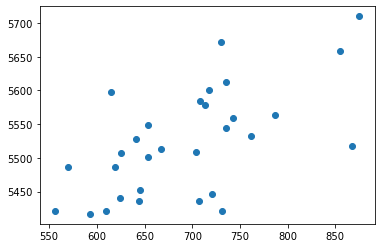

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(mlb11['runs'],mlb11['at_bats'])

In [4]:
mlb11['runs'].corr(mlb11['at_bats'])

0.6106270467206687

## Plotting the residuals

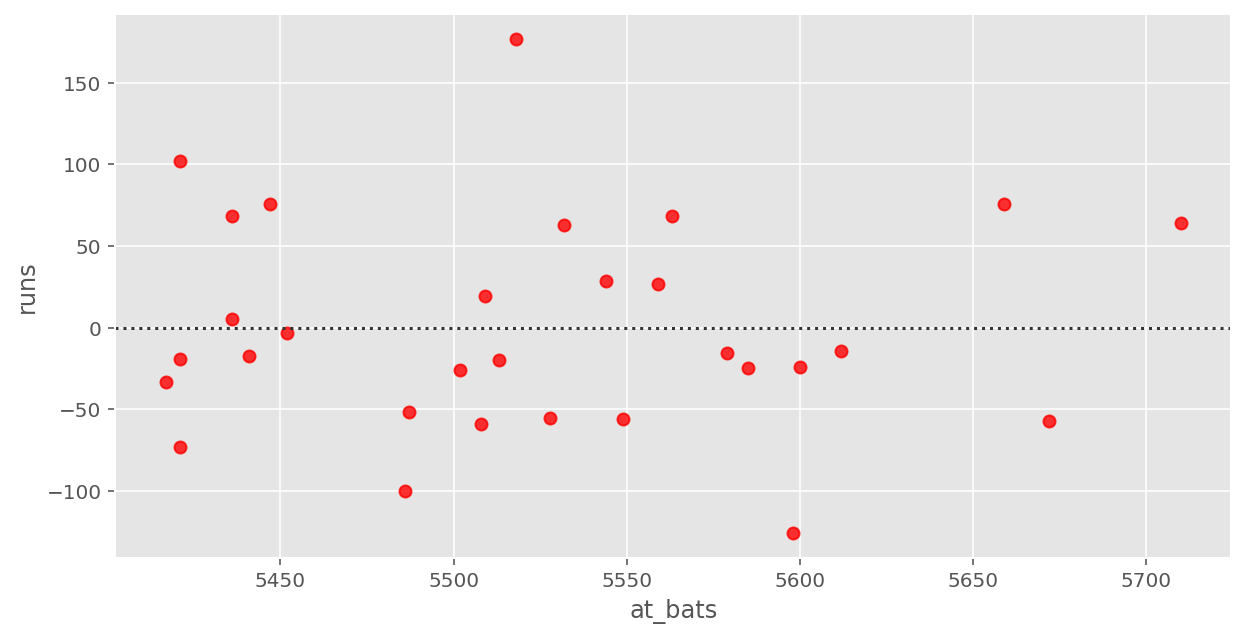

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

sns.residplot(mlb11['at_bats'], mlb11['runs'], color = 'red')
plt.show();

## The linear model

In [26]:
runs_bar = np.mean(mlb11['runs'])
bats_bar = np.mean(mlb11['at_bats'])

SSxy_L = [(mlb11['runs'][i]-runs_bar)*(mlb11['at_bats'][i]-bats_bar) for i in range(len(mlb11['runs']))]
SSxy = sum(SSxy_L)/len(SSxy_L)

SSxx_L = [(mlb11['at_bats'][i]-bats_bar)**2 for i in range(len(mlb11['at_bats']))]
SSxx = sum(SSxx_L)/len(SSxx_L)

b=SSxy/SSxx
a=runs_bar - b*bats_bar

In [6]:
import statsmodels.api as sm

formula_string = "runs ~ at_bats"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           0.000339
Time:                        09:26:59   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

In [7]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])

Intercept = -2789.242885442255
Slope = 0.6305499928382827


In [8]:
print('R-squared =', model_fitted.rsquared)

R-squared = 0.37286539018680676


# Prediction and prediction errors

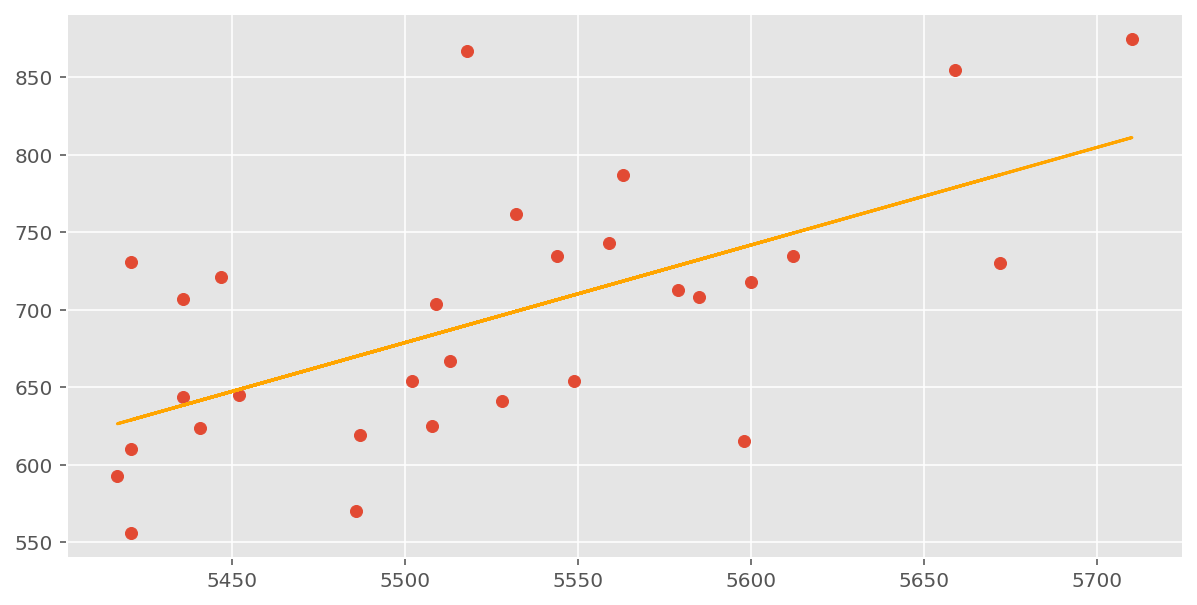

In [25]:
x = mlb11['at_bats']
y = mlb11['runs']

y_pred = a+b*x

plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

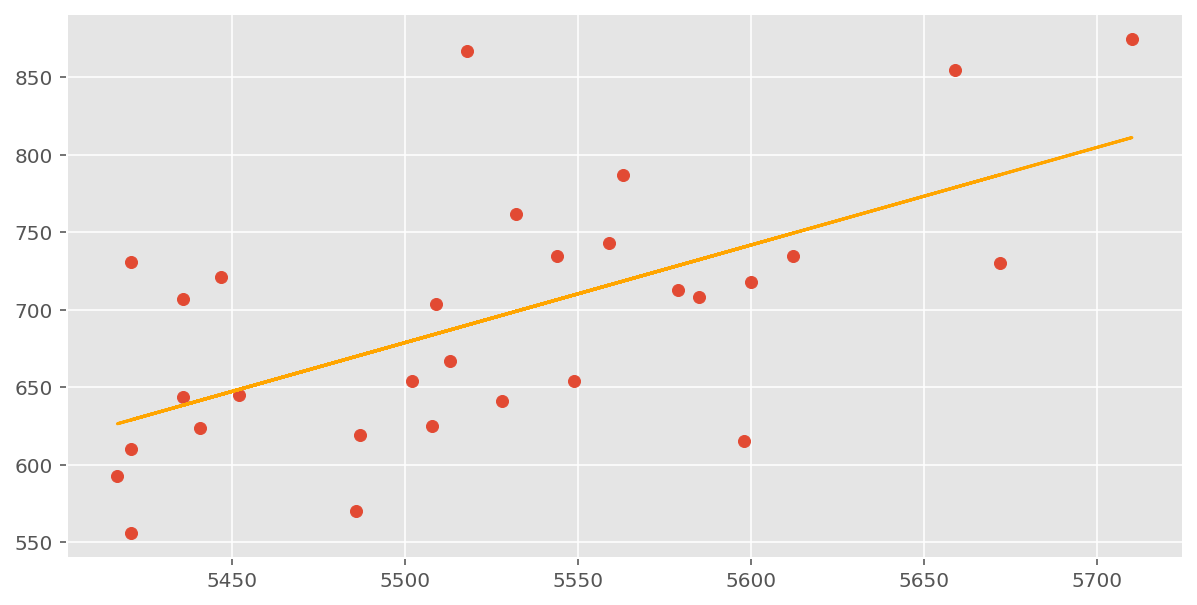

In [9]:
x = mlb11['at_bats']
y = mlb11['runs']

y_pred = model_fitted.predict(x)

plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

## Exercise 1: If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?

## Model diagnostics

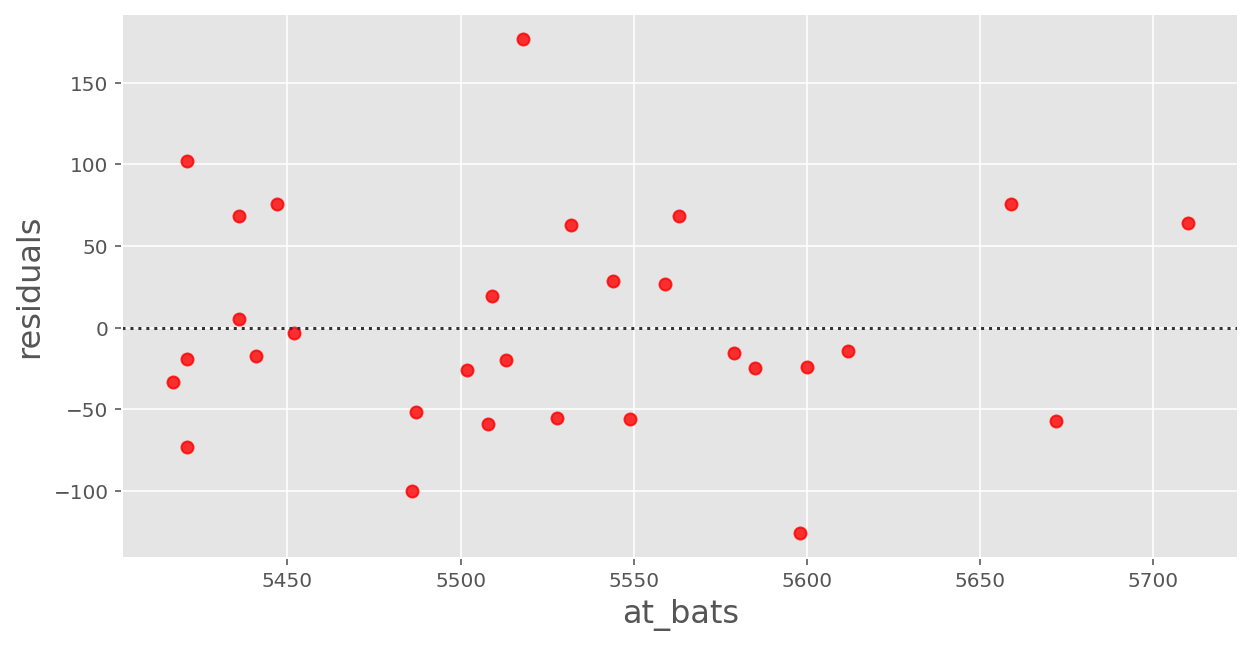

In [10]:
import seaborn as sns
sns.residplot(x, y, color = 'red')
plt.xlabel('at_bats', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

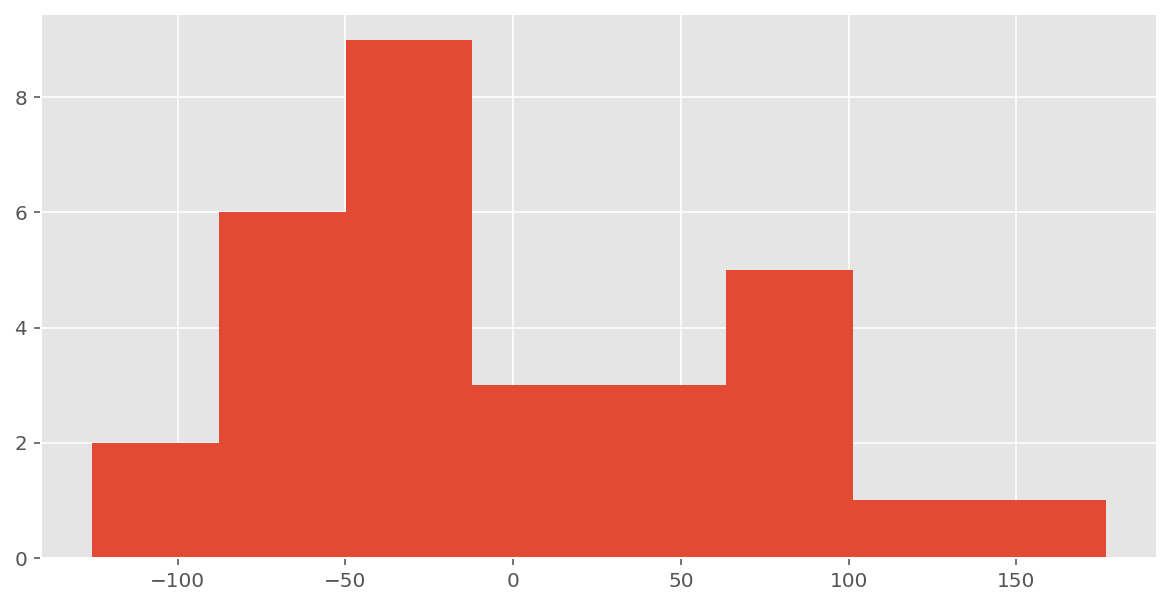

In [11]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

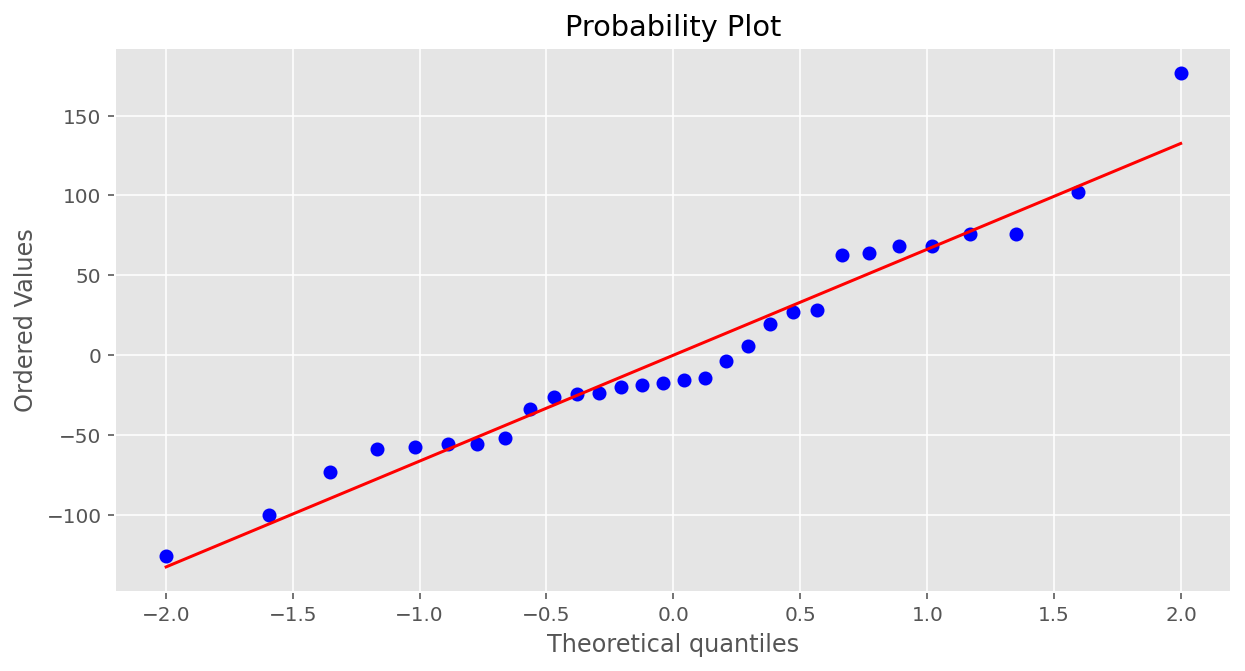

In [12]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

## Exercise 2: Fit a new model that uses homeruns to predict runs.